In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Define the non-linear function using PyTorch for GPU compatibility
def nonlinear_function(x):
    return torch.sin(5 * np.pi * x) / (5 * np.pi * x)

In [14]:
# Generate dataset
x_data = torch.linspace(-5, 5, 100).unsqueeze(1)
y_data = nonlinear_function(x_data)
x_data, y_data = x_data.float(), y_data.float()

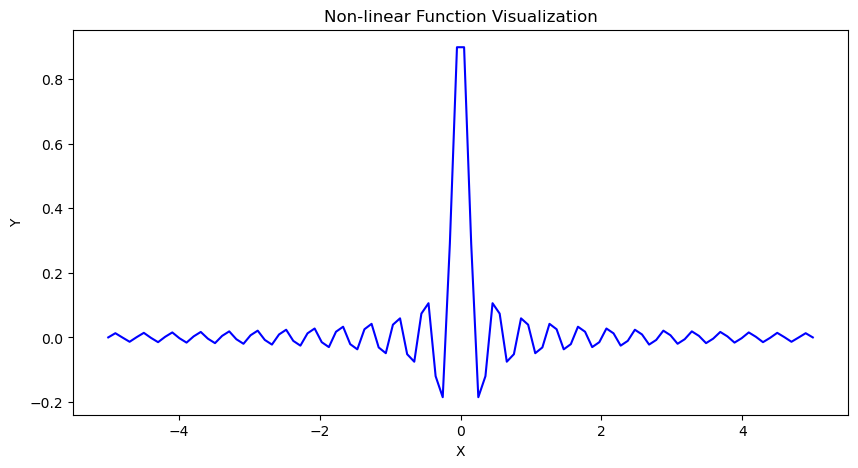

In [15]:
# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(x_data.numpy(), y_data.numpy(), 'blue')
plt.title('Non-linear Function Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [17]:
model = SimpleNN()

In [18]:
# Print model summary using torchinfo if available
try:
    from torchinfo import summary
    summary(model, input_size=(1, 1))
except ImportError:
    print("torchinfo not installed, skipping model summary.")

torchinfo not installed, skipping model summary.


In [19]:
# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# Train the model and record loss
epoch_losses = []
for epoch in range(100):
    optimizer.zero_grad()
    predictions = model(x_data)
    loss = criterion(predictions, y_data)
    loss.backward()
    optimizer.step()

    epoch_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1}, Loss: {loss.item():.3f}')

Epoch: 10, Loss: 0.019
Epoch: 20, Loss: 0.018
Epoch: 30, Loss: 0.017
Epoch: 40, Loss: 0.017
Epoch: 50, Loss: 0.017
Epoch: 60, Loss: 0.016
Epoch: 70, Loss: 0.016
Epoch: 80, Loss: 0.015
Epoch: 90, Loss: 0.015
Epoch: 100, Loss: 0.015


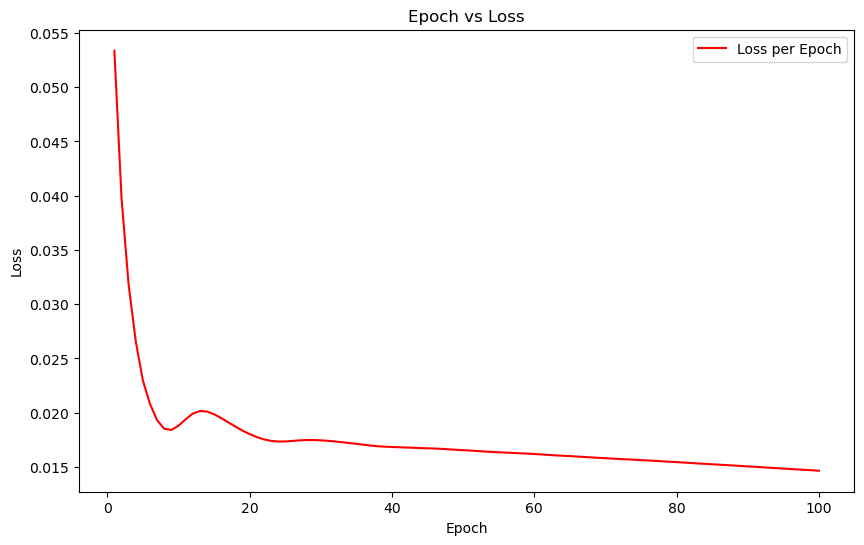

In [21]:
# Plot Epoch vs Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), epoch_losses, 'r-', label='Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()